In [26]:
import pandas as pd 
import os
import numpy as np
import csv
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('../') # To import Python script from other location
from ProjectAnalysis import ProjectAnalysis

In [14]:
projects = ['jclouds', 'maven-plugins','tomee']

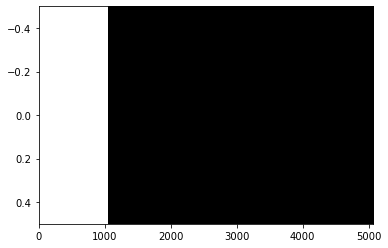

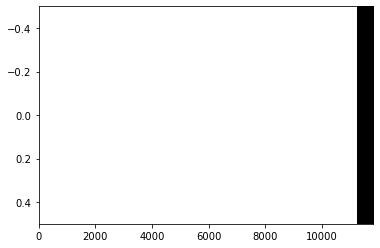

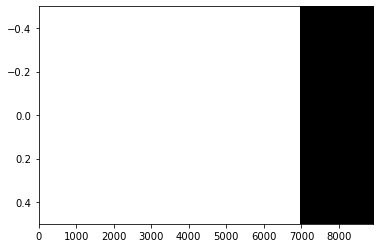

In [33]:
for project in projects:

    pa = ProjectAnalysis(project,  1, root="/home/results/Apache/")
    result = []

    with open('/home/previousResults/analyzedProjects/%s/compilation.log.csv'%project, 'r+') as f:
        oldResults = list(csv.DictReader(f, delimiter=","))

    for idx, commit_dict in enumerate(pa.csvDict.values()):
        build=pa.get_build_file(idx, commit_dict['commit'])
        hasPomOriginally = oldResults[idx]['POM_FILE'] == 'true'
        hasPomNow = any(b['build_system'] == 'Maven' for b in build['builds_checked'])
        result.append(hasPomOriginally==hasPomNow)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow([result], aspect='auto', cmap=plt.cm.gray, interpolation='nearest')

jclouds
-> Commit 1041
-> Rewritten the distribution generation to a) use descriptors from a shared dependency b) correctly package transitive dependencies and c) correctly JarJar these dependencies
-> Has pom

maven-plugins
-> Commit 11223
-> Upgrade maven-invoker from 2.0.9 to 2.1.1
-> Has pom

tomee
-> Commit 6955
-> Defaults and logging to info in ServicePool. Finals. Logging to debug in LocalInitialContext
-> Has pom